In [24]:
data <- read.csv("../data/projects/cP.p", header = FALSE, sep = ";", comment.char="", quote="",na.strings='NULL')
names(data) <- c("p","nmc","nblob","nsa","ncore","ncmt","na","ncopy")
data$copied <- data$ncopy > 0
data$nblob=as.integer(data$nblob)
data$ncore=as.integer(data$ncore)
data$na=as.integer(data$na)
summary(data)

                                        p               nmc         
 0-0Yang_canteen                         :     1   Min.   :  0.000  
 0-1123_mvp1001nights2                   :     1   1st Qu.:  1.000  
 0-1CxH_Hadoop-MapReduce-Spark-Excercises:     1   Median :  1.000  
 0-Eclipse-0_Tic-Tac-Toe                 :     1   Mean   :  6.392  
 0-Inacio-0_Prova-Lab-V                  :     1   3rd Qu.:  3.000  
 0-complexity_selfhealing                :     1   Max.   :500.000  
 (Other)                                 :734908                    
     nblob            nsa                ncore             ncmt         
 Min.   :    1   Min.   :     0.00   Min.   :   1.0   Min.   :       1  
 1st Qu.: 5404   1st Qu.:     0.00   1st Qu.:   2.0   1st Qu.:       2  
 Median :11819   Median :     0.00   Median :   2.0   Median :       7  
 Mean   :11384   Mean   :    69.87   Mean   : 140.3   Mean   :     676  
 3rd Qu.:17309   3rd Qu.:     0.00   3rd Qu.: 266.0   3rd Qu.:      32  
 Max.   :2

In [25]:
head(data)

,p,nmc,nblob,nsa,ncore,ncmt,na,ncopy,copied
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>
1,0-1123_mvp1001nights2,1,24178,0,2,1,2,0,FALSE
2,0-mYk-1_Project_01,1,14748,0,2,2,2,0,FALSE
3,0-taku_ossbasic2017,1,17122,0,266,4,675,0,FALSE
4,0-void_redux-counter,1,21996,0,2,1,2,0,FALSE
5,00-03_MassDM-V2,1,17122,0,2,5,2,0,FALSE
6,00-mao_red,1,1,0,2,1,2,0,FALSE


In [28]:
data$lnmc <- log(as.numeric(data$nmc) + 1)
data$lnblob <- log(as.numeric(data$nblob) + 1)
data$lnsa <- log(as.numeric(data$nsa) + 1)
data$lncore <- log(as.numeric(data$ncore) + 1)
data$lncmt <- log(as.numeric(data$ncmt) + 1)
data$lna <- log(as.numeric(data$na) + 1)
data$lncopy <- log(as.numeric(data$ncopy) + 1)
data_c <- data[,c("p","lnmc","lnblob","lnsa","lncore","lncmt","lna","lncopy","copied")]

In [29]:
summary(data_c)

                                        p               lnmc       
 0-0Yang_canteen                         :     1   Min.   :0.0000  
 0-1123_mvp1001nights2                   :     1   1st Qu.:0.6931  
 0-1CxH_Hadoop-MapReduce-Spark-Excercises:     1   Median :0.6931  
 0-Eclipse-0_Tic-Tac-Toe                 :     1   Mean   :1.2557  
 0-Inacio-0_Prova-Lab-V                  :     1   3rd Qu.:1.3863  
 0-complexity_selfhealing                :     1   Max.   :6.2166  
 (Other)                                 :734908                   
     lnblob             lnsa             lncore           lncmt        
 Min.   : 0.6931   Min.   : 0.0000   Min.   :0.6931   Min.   : 0.6931  
 1st Qu.: 8.5951   1st Qu.: 0.0000   1st Qu.:1.0986   1st Qu.: 1.0986  
 Median : 9.3775   Median : 0.0000   Median :1.0986   Median : 2.0794  
 Mean   : 8.5240   Mean   : 0.4831   Mean   :2.8291   Mean   : 2.6193  
 3rd Qu.: 9.7590   3rd Qu.: 0.0000   3rd Qu.:5.5872   3rd Qu.: 3.4965  
 Max.   :10.1024   Max. 

In [30]:
pred_n <- c(2:7)
cor(data_c[,pred_n],method="spearman")

,lnmc,lnblob,lnsa,lncore,lncmt,lna
lnmc,1.0000000,0.10329556,0.50007450,0.43729725,0.7700929,0.5316708
lnblob,0.1032956,1.00000000,0.05847527,0.09036291,0.1733729,0.1093828
lnsa,0.5000745,0.05847527,1.00000000,0.32777538,0.4643094,0.3488345
lncore,0.4372973,0.09036291,0.32777538,1.00000000,0.5017078,0.7642414
lncmt,0.7700929,0.17337286,0.46430940,0.50170784,1.0000000,0.6327536
lna,0.5316708,0.10938276,0.34883448,0.76424144,0.6327536,1.0000000


Standard deviations (1, .., p=6):
[1] 1.8032557 1.0413497 0.9542755 0.6256881 0.4784551 0.3644354

Rotation (n x k) = (6 x 6):
             PC1        PC2         PC3         PC4         PC5         PC6
lnmc   0.4783915 -0.3523689  0.08268271 -0.32164964 -0.18140973  0.70976986
lnblob 0.1657669  0.4433134  0.87175121  0.11266839 -0.02783620  0.05074825
lnsa   0.3970257 -0.4860361  0.08994247  0.73919010  0.18033780 -0.13829721
lncore 0.4057897  0.4505051 -0.35921083  0.27165967 -0.65334266 -0.05188346
lncmt  0.4942411 -0.1763443  0.10006889 -0.51216189 -0.02924212 -0.67190012
lna    0.4208253  0.4571938 -0.29338975 -0.03655901  0.71139455  0.14277105


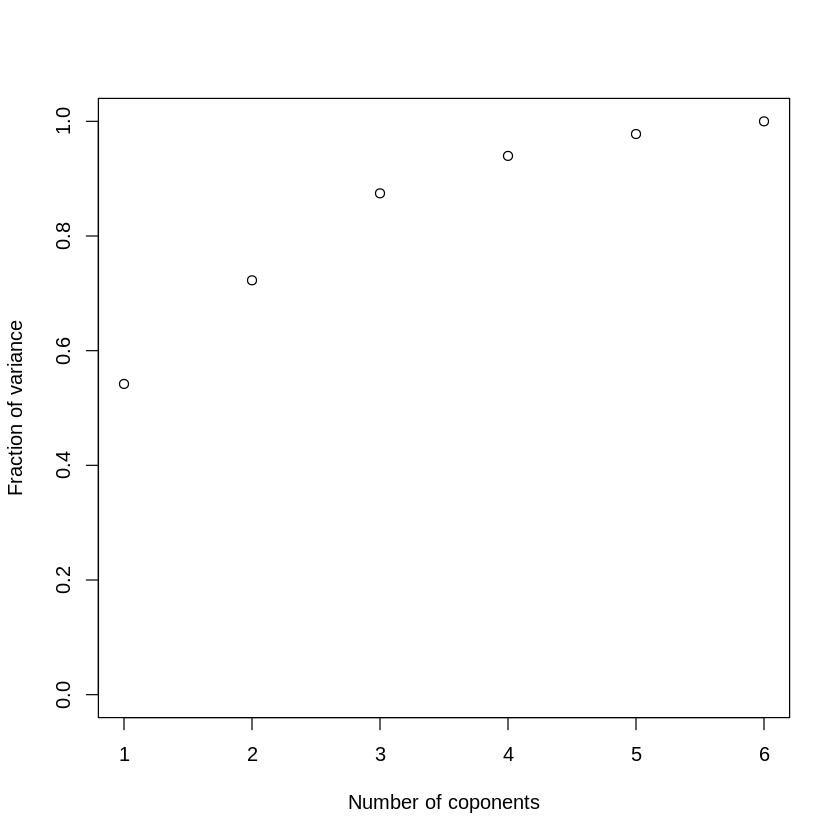

In [32]:
pca <- prcomp(data_c[,pred_n], retx=F, scale=T)
print(pca)
var <- sum(pca$sdev^2)
cumVar <- cumsum(pca$sdev^2)
plot(1:6,cumVar/var,ylim=c(0,1),xlab="Number of coponents",ylab="Fraction of variance")

In [33]:
n <- 0
varPer <- 0.9
for (i in c(1:length(pca$sdev))) {
    if(cumVar[i] > var*varPer) {
        n <- i
        break
    }
}
res <- pca$rotation[,1:n]
resAbs <- res
resAbs[res<0] <- -res[res<0]
for (i in 1:n)
  print(t(res[resAbs[,i]>.3,i,drop=FALSE]));

         lnmc      lnsa    lncore     lncmt       lna
PC1 0.4783915 0.3970257 0.4057897 0.4942411 0.4208253
          lnmc    lnblob       lnsa    lncore       lna
PC2 -0.3523689 0.4433134 -0.4860361 0.4505051 0.4571938
       lnblob     lncore
PC3 0.8717512 -0.3592108
          lnmc      lnsa      lncmt
PC4 -0.3216496 0.7391901 -0.5121619


In [34]:
vnam <- names(data_c[,pred_n])
len <- dim(data_c[,pred_n])[2]
res <- vector(mode="list", length=len)
for (i in 1:len){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-i],collapse="+"),sep="~"));
  res[[i]] <- lm(fmla,data=data_c[,pred_n]);
}
for (i in 1:len) {
    print(c(vnam[i],"-> ",summary(res[[i]])$adj.r.squared),quote=FALSE)
}

[1] lnmc              ->                0.772390361288751
[1] lnblob             ->                 0.0735555882997078
[1] lnsa              ->                0.489007806221941
[1] lncore            ->                0.592321246702561
[1] lncmt             ->                0.761203916415668
[1] lna               ->                0.630908805154734


In [50]:
lm <- lm(lncopy~lncmt+lnsa, data=data_c)
summary(lm)


Call:
lm(formula = lncopy ~ lncmt + lnsa, data = data_c)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.3846  -0.7653  -0.1479   0.3195  13.7604 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.428033   0.003178  -134.7   <2e-16 ***
lncmt        0.524272   0.001168   448.7   <2e-16 ***
lnsa         0.530154   0.001597   332.0   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.481 on 734911 degrees of freedom
Multiple R-squared:  0.5117,	Adjusted R-squared:  0.5117 
F-statistic: 3.851e+05 on 2 and 734911 DF,  p-value: < 2.2e-16


In [51]:
glm <- glm(copied~lncmt+lnsa,data=data_c,family=binomial)
summary(glm)


Call:
glm(formula = copied ~ lncmt + lnsa, family = binomial, data = data_c)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.4466  -0.7866  -0.5730   0.9173   1.9432  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.171365   0.005810  -373.7   <2e-16 ***
lncmt        0.645700   0.002166   298.1   <2e-16 ***
lnsa         0.285200   0.004068    70.1   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 990582  on 734913  degrees of freedom
Residual deviance: 787985  on 734911  degrees of freedom
AIC: 787991

Number of Fisher Scoring iterations: 5


In [15]:
lm <- lm(lncopy~lnmc+lnblob+lncmt, data=data_c)
summary(lm)


Call:
lm(formula = lncopy ~ lnmc + lnblob + lncmt, data = data_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9587 -0.7299 -0.1139  0.3322 13.4033 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -0.9096742  0.0070580 -128.886  < 2e-16 ***
lnmc         0.9127463  0.0036796  248.056  < 2e-16 ***
lnblob      -0.0031440  0.0008024   -3.918 8.92e-05 ***
lncmt        0.3786123  0.0018423  205.510  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.525 on 734910 degrees of freedom
Multiple R-squared:  0.4824,	Adjusted R-squared:  0.4824 
F-statistic: 2.283e+05 on 3 and 734910 DF,  p-value: < 2.2e-16


In [16]:
glm <- glm(copied~lnmc+lnblob+lncmt,data=data_c,family=binomial)
summary(glm)


Call:
glm(formula = copied ~ lnmc + lnblob + lncmt, family = binomial, 
    data = data_c)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0869  -0.8110  -0.6077   0.9117   2.2291  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.175628   0.014805 -214.50   <2e-16 ***
lnmc         0.430754   0.006185   69.64   <2e-16 ***
lnblob       0.098942   0.001597   61.94   <2e-16 ***
lncmt        0.535239   0.002934  182.45   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 990582  on 734913  degrees of freedom
Residual deviance: 785021  on 734910  degrees of freedom
AIC: 785029

Number of Fisher Scoring iterations: 5


In [31]:
lm <- lm(lncopy~lnmc+lncmt, data=data_c)
summary(lm)


Call:
lm(formula = lncopy ~ lnmc + lncmt, data = data_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9463 -0.7297 -0.1135  0.3310 13.3976 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.934442   0.003140  -297.6   <2e-16 ***
lnmc         0.914186   0.003661   249.7   <2e-16 ***
lncmt        0.377111   0.001802   209.3   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.525 on 734911 degrees of freedom
Multiple R-squared:  0.4824,	Adjusted R-squared:  0.4824 
F-statistic: 3.425e+05 on 2 and 734911 DF,  p-value: < 2.2e-16


In [32]:
glm <- glm(copied~lnmc+lncmt,data=data_c,family=binomial)
summary(glm)


Call:
glm(formula = copied ~ lnmc + lncmt, family = binomial, data = data_c)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.1709  -0.7996  -0.5821   0.9082   1.9282  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.367949   0.006020 -393.35   <2e-16 ***
lnmc         0.409360   0.006197   66.06   <2e-16 ***
lncmt        0.569298   0.002898  196.46   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 990582  on 734913  degrees of freedom
Residual deviance: 789365  on 734911  degrees of freedom
AIC: 789371

Number of Fisher Scoring iterations: 5
